# Experiment data using Minitown and MiniCPS. Attack on PLC1
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is an attack on PLC1. In this attack, an attacker takes control of the PLC1. When the attack is active, a replay attack is launched. The replay attack is done with 100 measurements of the tank level. Between iteration 100 and 299 the PLC1 sends the T_LVL values to the PLC2, but also stores them in a list. Later, between iterations 250 and 350 the PLC1 sends the stored values to PLC2, instead of sending the real measured values of T_LVL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

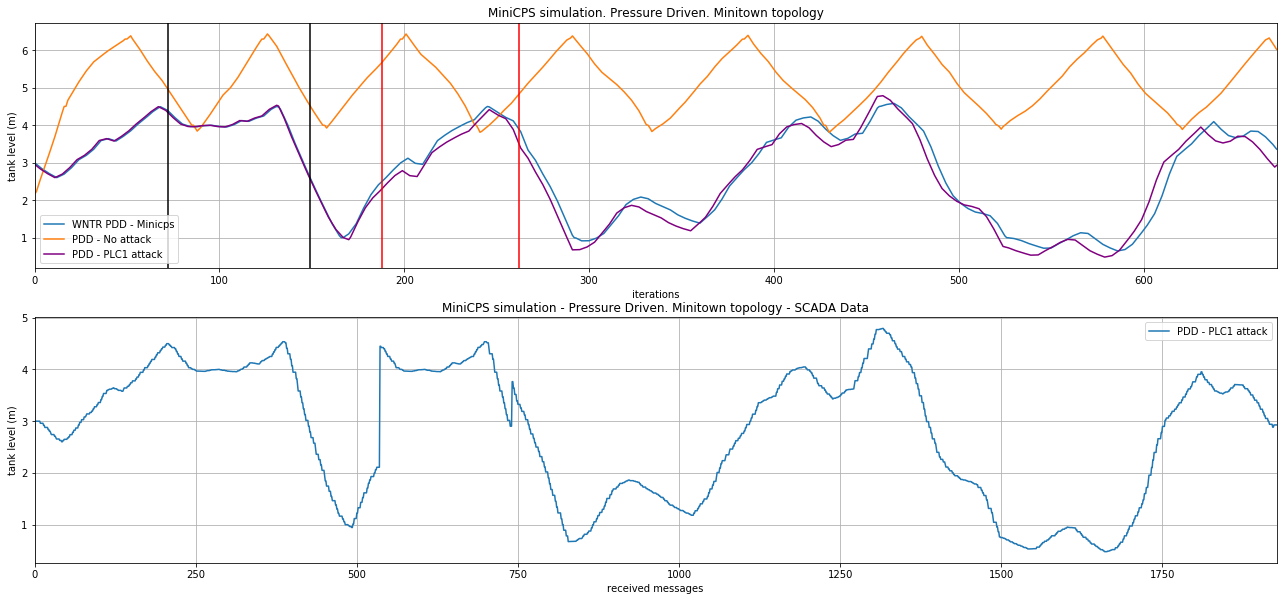

In [2]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data_pdd = pd.read_csv('../no_minicps_pdd.csv')
#no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/physical_process.csv')
no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/output_api/output/physical_process.csv')
attack_plc1 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc1/physical_results.csv')

scada_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_attack_plc1 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc1/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["TANK_LEVEL"].plot(label='WNTR PDD - Minicps', ax=dd)
no_attack["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
attack_plc1["TANK_LEVEL"].plot(label='PDD - PLC1 attack', ax=dd, color="purple")

plt.axvline(x=72, color="black")
plt.axvline(x=149, color="black")
plt.axvline(x=188, color="red")
plt.axvline(x=262, color="red")
plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_attack_plc1["TANK_LEVEL"].plot(label='PDD - PLC1 attack', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


The first subplot shows the phyisical process information (called ground truth) and the second subplot shows the information received by the SCADA server. Note that the x axis in the second subplot is "received messages" and not "iterations". The time between the black horizontal lines represents the attacker saving mesaurements to be replayed in the time between the red lines. Although the PLC2 is receiving wrong information, the information does not cause the PLC2 to activate the pumps in different sequence as the expected one. This is because for the fake values a change in the pump behavior is not necesary. Nevertheless, the PLC1 also sends this erroneous information to the SCADA which reports the fake values

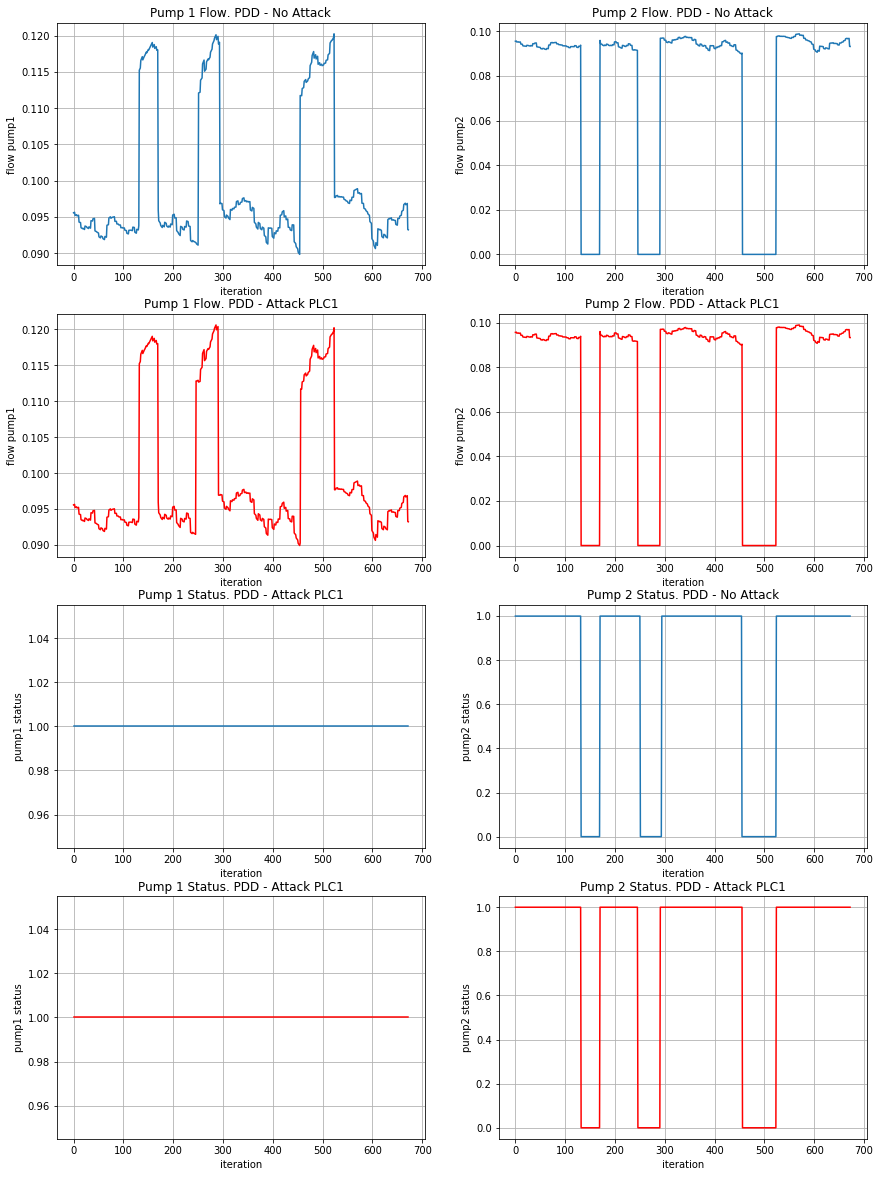

In [8]:
fp1 = no_attack['FLOW_PUMP1']
fp2 = attack_plc1['FLOW_PUMP2']
sp1 = no_attack['STATUS_PUMP1']
sp2 = no_attack['STATUS_PUMP2']

fp1_attack = attack_plc1['FLOW_PUMP1']
fp2_attack = attack_plc1['FLOW_PUMP2']
sp1_attack = attack_plc1['STATUS_PUMP1']
sp2_attack = attack_plc1['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - Attack PLC1')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - Attack PLC1')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC1')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC1')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - Attack PLC1')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()

In the above subplots we can see that the pump behavior stays the same. Other attacks cause the pumps to be activated wrongly and have a bigger impact in the physical process